In [1]:
%matplotlib inline
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import rawpy
from PIL import Image, ImageOps

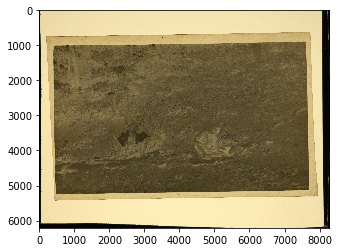

In [2]:
# get image from RAW
raw_negative = rawpy.imread('/Users/jeremy/Pictures/bennett_negatives/Capture/moore_35mm-071.RAF')
rgb_negative = raw_negative.postprocess()

plt.imshow(rgb_negative)

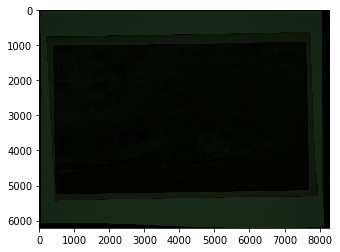

In [3]:
# get linear, unprocessed image from RAW
rgb_negative_linear = raw_negative.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), 
                                               user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True)

plt.imshow(rgb_negative_linear)

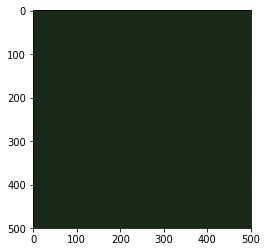

In [4]:
# crop out a box in the center below the negative where the light is brighetest
rgb_negative_linear_crop = rgb_negative_linear[5500:6000, 4000:4500]  # np is height, width

plt.imshow(rgb_negative_linear_crop)

In [5]:
# get average values for r, g, b
avg_r = np.average(rgb_negative_linear_crop[..., 0])
avg_g = np.average(rgb_negative_linear_crop[..., 1])
avg_b = np.average(rgb_negative_linear_crop[..., 2])

print(avg_r, avg_g, avg_b)

23.863116 42.110972 22.700256


In [6]:
# scale values to g
base_wb = [avg_g/avg_r, 1.0, avg_g/avg_b, 1.0]

print(base_wb)

[1.7646887355364653, 1.0, 1.8550879778624523, 1.0]


In [7]:
# estimate brightness
base_brightness = 255/avg_g

print(base_brightness)

6.055428974662471


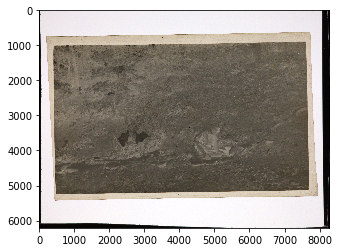

In [8]:
rgb_base_corrected = raw_negative.postprocess(user_wb=base_wb)

plt.imshow(rgb_base_corrected)

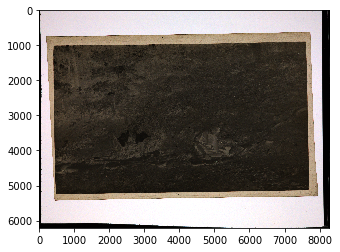

In [9]:
# correct negative including brightness
rgb_negative_corrected = raw_negative.postprocess(gamma=(1, 1), user_wb=base_wb, bright=base_brightness, no_auto_bright=True)

plt.imshow(rgb_negative_corrected)

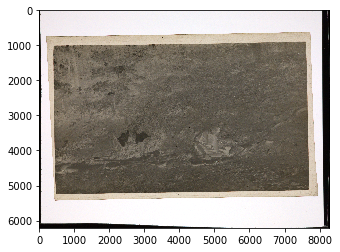

In [10]:
# correct negative including brightness without linear gamma
rgb_negative_corrected = raw_negative.postprocess(user_wb=base_wb, bright=base_brightness, no_auto_bright=True)

plt.imshow(rgb_negative_corrected)

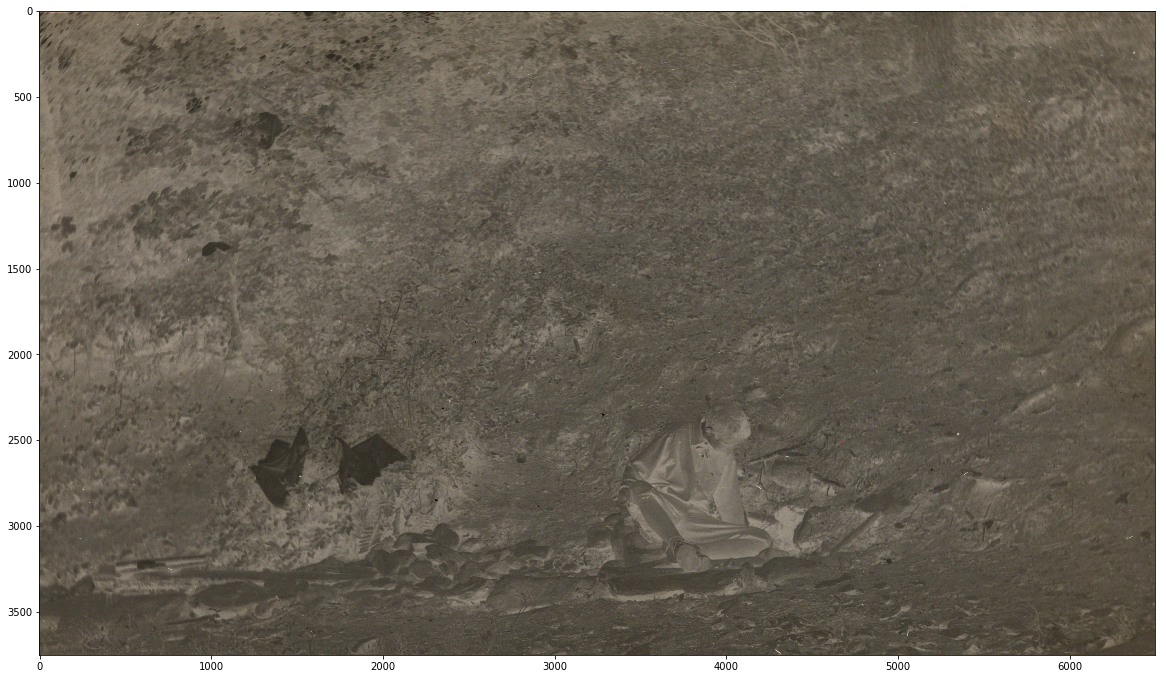

In [11]:
# crop to image area
rgb_negative_corrected_cropped = rgb_base_corrected[1000:4750, 1000:7500]  # np is height, width

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(rgb_negative_corrected_cropped)

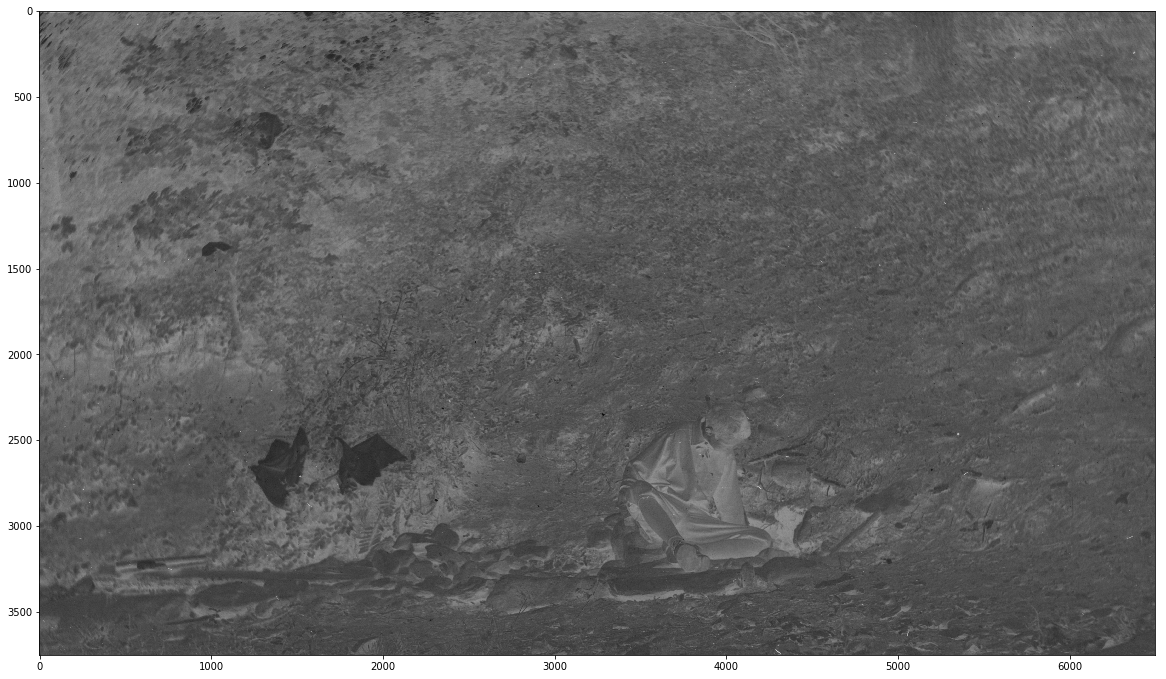

In [12]:
# show green channel of negative
np_g_channel = rgb_negative_corrected_cropped[..., 1]

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(np_g_channel, cmap='gray')

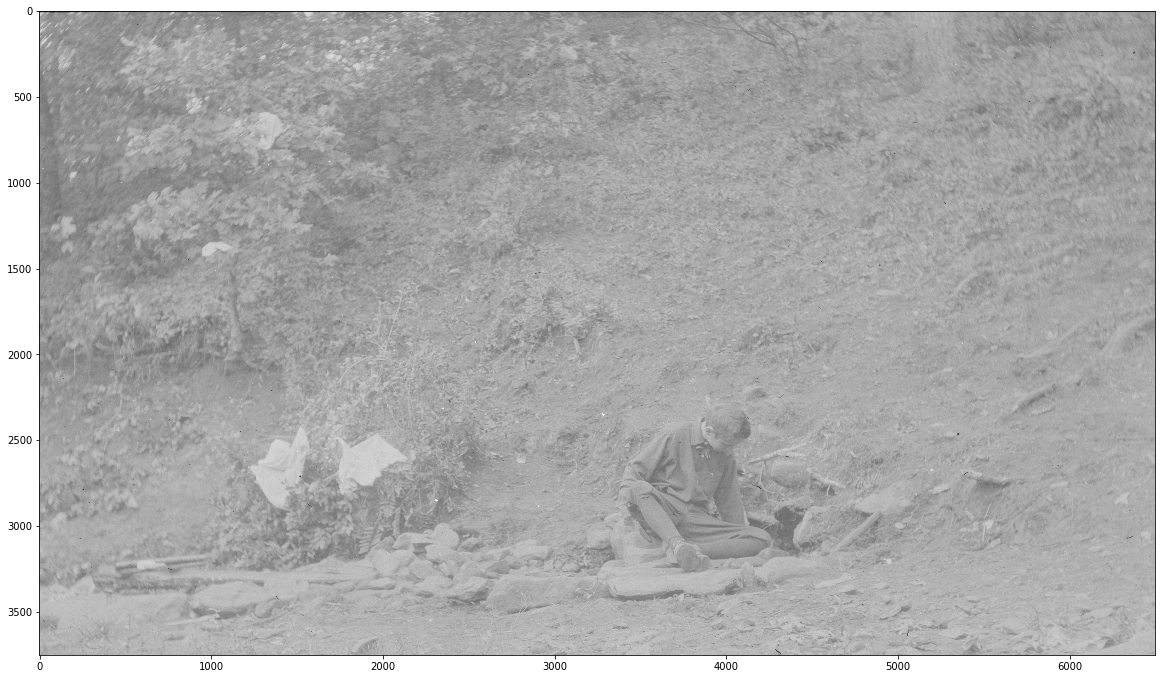

In [13]:
# show green channel of negative inverted with cmap
np_g_channel = rgb_negative_corrected_cropped[..., 1]

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(np_g_channel, cmap='gray_r')

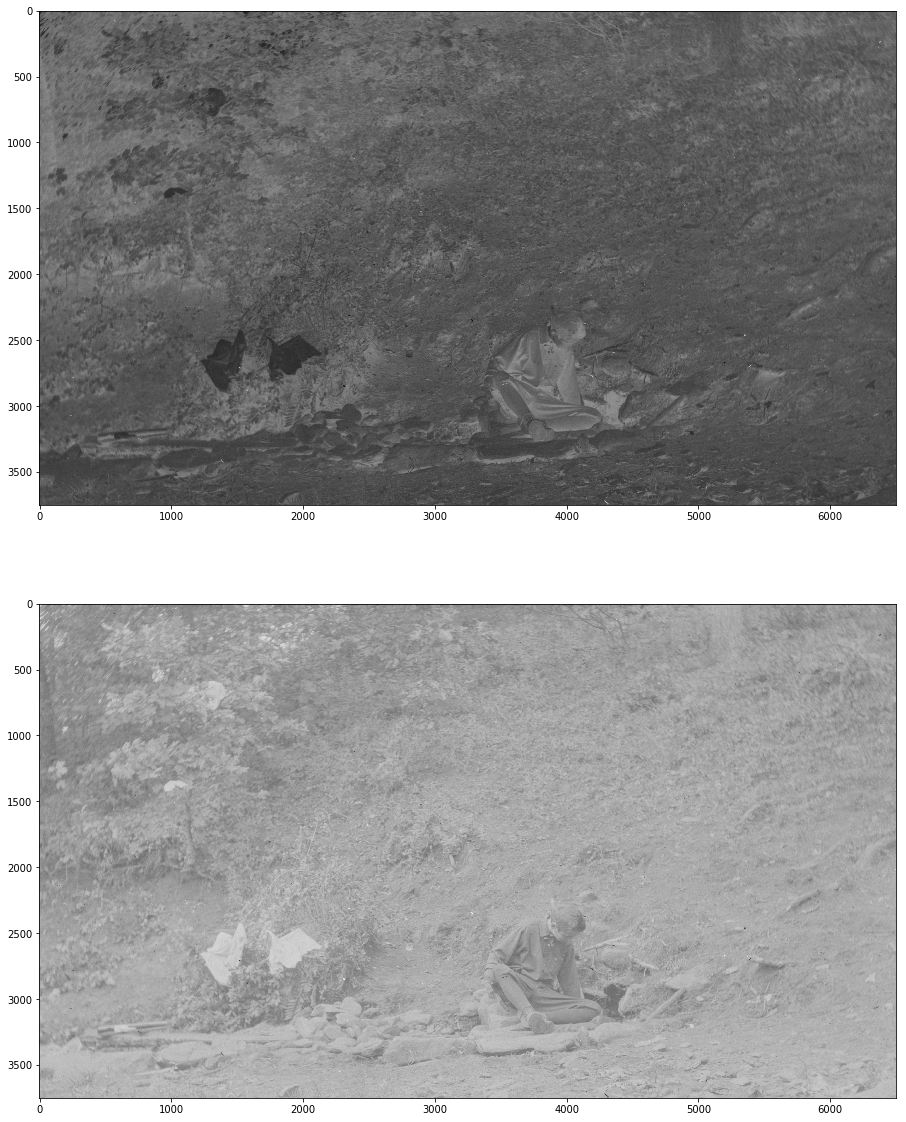

In [14]:
# show green channel of negative inverted with cmap
np_g_channel = rgb_negative_corrected_cropped[..., 1]

fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].imshow(np_g_channel, cmap='gray')
axes[1].imshow(np_g_channel, cmap='gray_r')

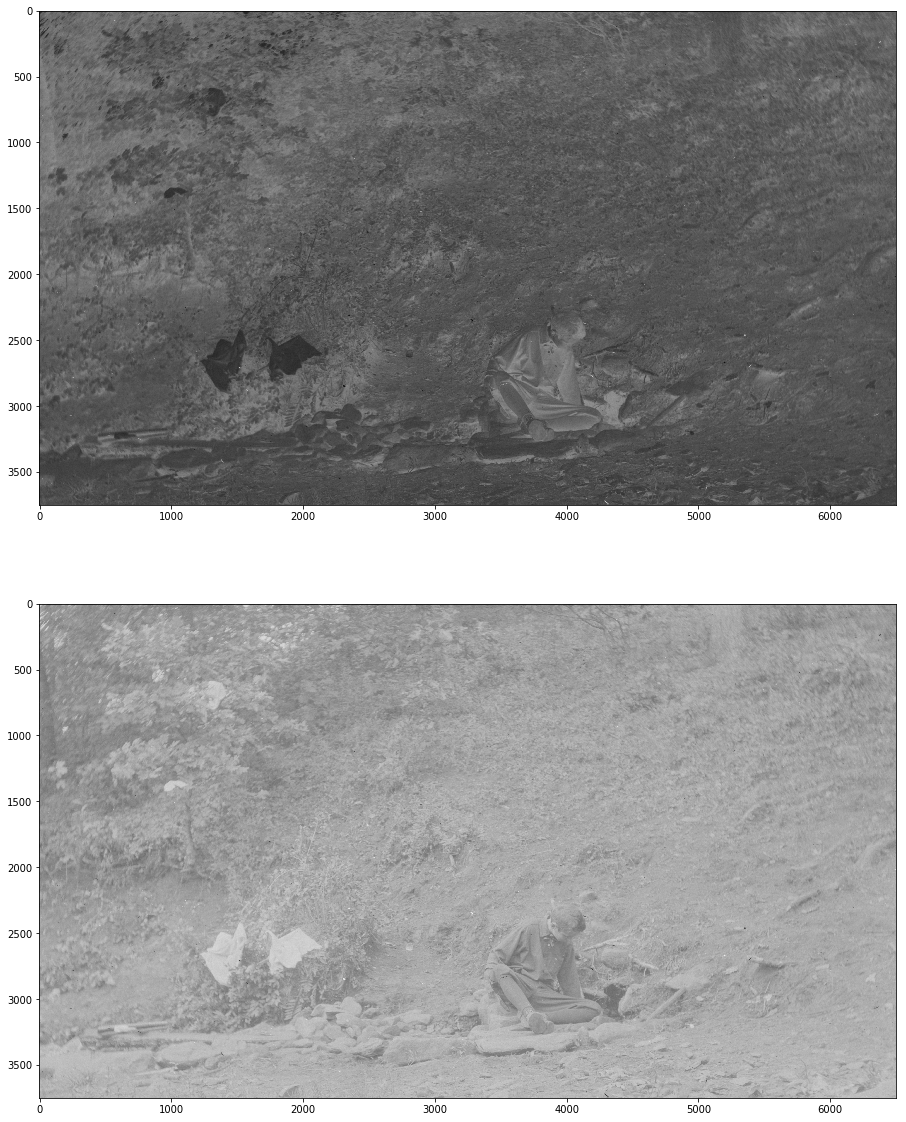

In [15]:
# show green channel of negative inverted with cmap
pil_g_channel = Image.fromarray(np_g_channel)

pil_g_channel_inverted = ImageOps.invert(pil_g_channel)

fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].imshow(pil_g_channel)
axes[1].imshow(pil_g_channel_inverted)

In [ ]:
# invert and set black level
max_r = np.max(rgb_negative_corrected_cropped[..., 0])
max_g = np.max(rgb_negative_corrected_cropped[..., 1])
max_b = np.max(rgb_negative_corrected_cropped[..., 2])

print(max_r, max_g, max_b)

In [ ]:
# invert image
rgb_positive = rgb_negative_corrected_cropped.copy()

rgb_positive[..., 0] = max_r - rgb_positive[..., 0]
rgb_positive[..., 1] = max_g - rgb_positive[..., 1]
rgb_positive[..., 2] = max_b - rgb_positive[..., 2]

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(rgb_positive)

In [ ]:
# just show green channel
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(rgb_positive[..., 1], cmap='gray')

In [ ]:
np_g_channel = rgb_positive[..., 1]

pil_g_channel = Image.fromarray(np_g_channel)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(pil_g_channel, cmap='gray')

In [ ]:
np_g_channel_test = np.expand_dims(np_g_channel, axis = 2)
np_g_channel_test = np.concatenate((np_g_channel_test, np_g_channel_test, np_g_channel_test), axis = 2)
print(np_g_channel_test.shape)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(np_g_channel_test, cmap='gray')

In [ ]:
pil_g_channel.getcolors()